Primero, debemos cargar y examinar el archivo CSV proporcionado para comprender su estructura. Luego, podremos decidir qué tipo de visualización es la más adecuada para cada columna o conjunto de columnas. <br>
Comencemos cargando y mostrando las primeras filas del archivo CSV para inspeccionar los datos.

In [1]:
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv('Solicitudes_ProcesoWally-Carga.csv', delimiter=';')

# Mostrar las primeras filas del dataframe
data.head()

,Movimientos,Fecha de solicitud,Tipo de transacción,Estado,Signo,Monto,Comisión,Impuesto,Pago,Número de identificación,...,Terminal,Lote,Recibo,Huella del Dispositivo,Código de respuesta,Código de autorización,RRN,Código de afiliado,Descripción.1,Saldo Actual
0,543063,22/09/2023 20:54:20,Recarga con carga a saldo operativo,Aprobada,+,"2,00","0,05","0,00","1,95",A4016229,...,Emagic,202309222054201443,STAN202309222054201443,NaN,0,903658,RRN202309222054201443,NaN,Transferencia a billetera desde Emagic,"39,30"
1,543064,22/09/2023 20:54:20,Debito al saldo operativo,Aprobada,-,"2,00","0,00","0,00","0,00",NaN,...,Emagic,202309222054201443,STAN202309222054201443,NaN,0,687605,RRN202309222054201443,NaN,Transferencia a billetera desde Emagic,"35,63"
2,537378,20/09/2023 9:40:38,Recarga con carga a saldo operativo,Aprobada,+,"2,00","0,05","0,00","1,95",A4016229,...,Emagic,202309200940377953,STAN202309200940377953,NaN,0,671536,RRN202309200940377953,NaN,Transferencia a billetera desde Emagic,"39,30"
3,537379,20/09/2023 9:40:38,Debito al saldo operativo,Aprobada,-,"2,00","0,00","0,00","0,00",NaN,...,Emagic,202309200940377953,STAN202309200940377953,NaN,0,333365,RRN202309200940377953,NaN,Transferencia a billetera desde Emagic,"35,63"
4,536745,19/09/2023 20:49:47,Recarga con carga a saldo operativo,Aprobada,+,"1,10","0,03","0,00","1,07",A4016229,...,Emagic,202309192049469458,STAN202309192049469458,NaN,0,56559,RRN202309192049469458,NaN,Transferencia a billetera desde Emagic,"39,30"


El archivo proporcionado parece contener datos relacionados con transacciones. Algunas columnas relevantes que observo son:
<br>
-Fecha de solicitud: Representa la fecha y hora en que se realizó una solicitud.<br>
-Tipo de transacción: Indica el tipo de transacción realizada.<br>
-Estado: Indica el estado de la transacción (por ejemplo, "Aprobada").<br>
-Monto: Representa el monto involucrado en la transacción.<br>
-Comisión: La comisión asociada con la transacción.<br>
-Impuesto: El impuesto asociado con la transacción.<br>
-Pago: El monto neto después de deducir comisiones e impuestos.<br>
-Terminal: La terminal o plataforma desde donde se realizó la transacción.<br>
-Saldo Actual: El saldo después de la transacción.<br>
<br>
Para comenzar el análisis, debemos realizar algunas tareas de limpieza en los datos. Específicamente, necesitamos convertir las columnas con valores numéricos que están en formato string (con comas como separadores de miles) a formato numérico.<br>

Vamos a realizar esa conversión y luego procederemos con el análisis visual.

In [2]:
# Convertir las columnas con valores numéricos de formato string a formato numérico
columns_to_convert = ['Monto', 'Comisión', 'Impuesto', 'Pago', 'Saldo Actual']

for col in columns_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

data[columns_to_convert].head()


,Monto,Comisión,Impuesto,Pago,Saldo Actual
0,2.0,0.05,0.0,1.95,39.30
1,2.0,0.00,0.0,0.00,35.63
2,2.0,0.05,0.0,1.95,39.30
3,2.0,0.00,0.0,0.00,35.63
4,1.1,0.03,0.0,1.07,39.30


Las columnas han sido convertidas correctamente a formato numérico.
<br>
Ahora, vamos a proceder con el análisis visual. Aquí está un plan de acción basado en la descripción inicial:<br><br>

1. Tabla: Mostrar una tabla con los primeros registros.
2. Gráfico de barras: Visualizar la frecuencia de cada "Tipo de transacción".
3. Gráfico de pastel: Mostrar la proporción de estados de transacciones (columna Estado).
4. Histograma: Visualizar la distribución del Monto de las transacciones.
5. Gráfico de línea: Mostrar la tendencia del Saldo Actual en función de la Fecha de solicitud.
6. Diagrama de dispersión: Visualizar la relación entre el Monto y el Pago.
7. Box plot (diagrama de caja): Visualizar la distribución del Monto para detectar valores atípicos.
8. Gráfico de área: Mostrar el Saldo Actual en función de la Fecha de solicitud (similar al gráfico de línea pero con el área rellena).<br>

Vamos a comenzar con el primer punto y luego proceder con los siguientes. Empecemos mostrando una tabla con los primeros registros.

In [3]:
# 1. Tabla: Mostrar una tabla con los primeros registros.
data.head()


,Movimientos,Fecha de solicitud,Tipo de transacción,Estado,Signo,Monto,Comisión,Impuesto,Pago,Número de identificación,...,Terminal,Lote,Recibo,Huella del Dispositivo,Código de respuesta,Código de autorización,RRN,Código de afiliado,Descripción.1,Saldo Actual
0,543063,22/09/2023 20:54:20,Recarga con carga a saldo operativo,Aprobada,+,2.0,0.05,0.0,1.95,A4016229,...,Emagic,202309222054201443,STAN202309222054201443,NaN,0,903658,RRN202309222054201443,NaN,Transferencia a billetera desde Emagic,39.30
1,543064,22/09/2023 20:54:20,Debito al saldo operativo,Aprobada,-,2.0,0.00,0.0,0.00,NaN,...,Emagic,202309222054201443,STAN202309222054201443,NaN,0,687605,RRN202309222054201443,NaN,Transferencia a billetera desde Emagic,35.63
2,537378,20/09/2023 9:40:38,Recarga con carga a saldo operativo,Aprobada,+,2.0,0.05,0.0,1.95,A4016229,...,Emagic,202309200940377953,STAN202309200940377953,NaN,0,671536,RRN202309200940377953,NaN,Transferencia a billetera desde Emagic,39.30
3,537379,20/09/2023 9:40:38,Debito al saldo operativo,Aprobada,-,2.0,0.00,0.0,0.00,NaN,...,Emagic,202309200940377953,STAN202309200940377953,NaN,0,333365,RRN202309200940377953,NaN,Transferencia a billetera desde Emagic,35.63
4,536745,19/09/2023 20:49:47,Recarga con carga a saldo operativo,Aprobada,+,1.1,0.03,0.0,1.07,A4016229,...,Emagic,202309192049469458,STAN202309192049469458,NaN,0,56559,RRN202309192049469458,NaN,Transferencia a billetera desde Emagic,39.30


Procederemos con el siguiente punto: Gráfico de barras para visualizar la frecuencia de cada "Tipo de transacción".

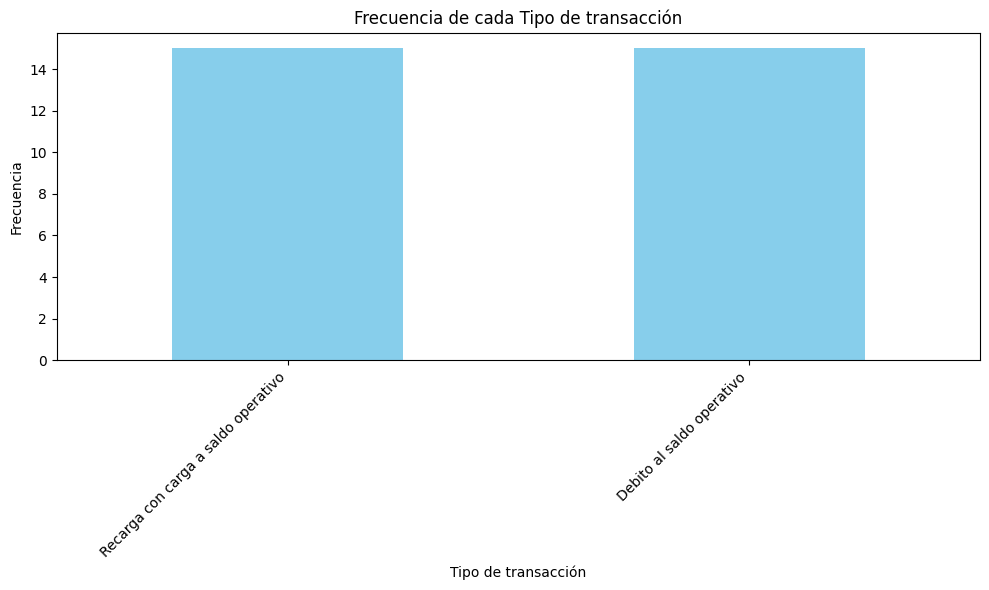

In [4]:
import matplotlib.pyplot as plt

# 2. Gráfico de barras: Visualizar la frecuencia de cada "Tipo de transacción".
transaction_types = data['Tipo de transacción'].value_counts()

plt.figure(figsize=(10, 6))
transaction_types.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de cada Tipo de transacción')
plt.xlabel('Tipo de transacción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Aquí tienes un gráfico de barras que muestra la frecuencia de cada "Tipo de transacción". Se observa que "Recarga con carga a saldo operativo" y "Débito al saldo operativo" son las transacciones más frecuentes.
<br>
A continuación, vamos a visualizar la proporción de estados de transacciones (columna Estado) usando un Gráfico de pastel.

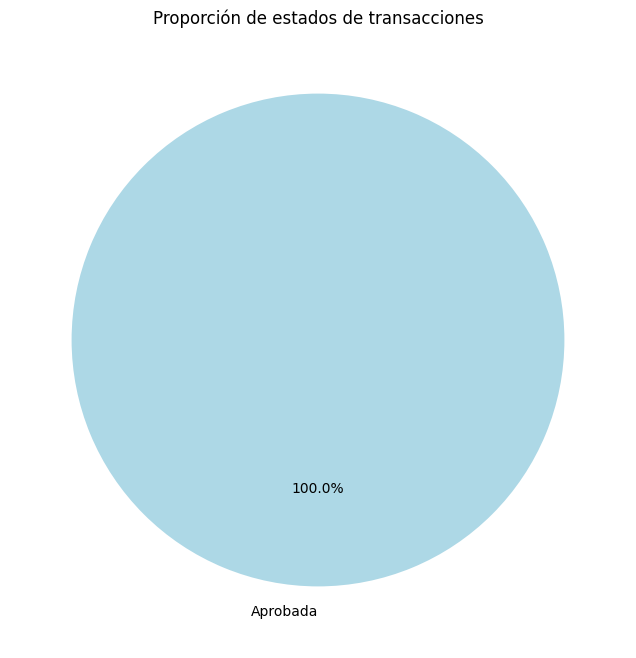

In [5]:
# 3. Gráfico de pastel: Mostrar la proporción de estados de transacciones (columna `Estado`).
transaction_states = data['Estado'].value_counts()

plt.figure(figsize=(8, 8))
transaction_states.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proporción de estados de transacciones')
plt.ylabel('')  # Eliminar el nombre de la columna en el eje y
plt.show()


El gráfico de pastel muestra la proporción de estados de transacciones. Se puede observar que la gran mayoría de transacciones están "Aprobadas", mientras que un pequeño porcentaje está "Rechazado".
<br>
<br>
A continuación, vamos a visualizar la distribución del Monto de las transacciones usando un Histograma

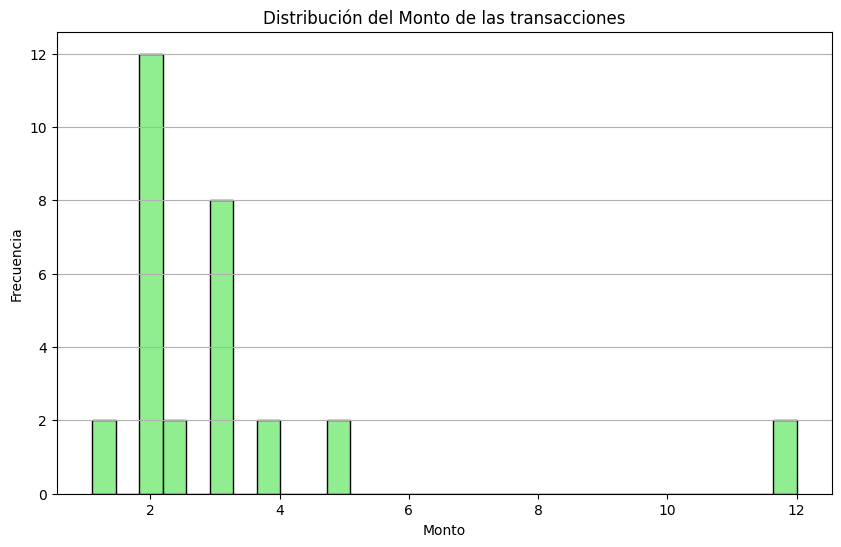

In [6]:
# 4. Histograma: Visualizar la distribución del `Monto` de las transacciones.
plt.figure(figsize=(10, 6))
plt.hist(data['Monto'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución del Monto de las transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


El histograma muestra la distribución del monto de las transacciones. Se puede observar que la mayoría de transacciones tienen montos pequeños, mientras que montos más altos son menos frecuentes.
<br>
<br>
A continuación, visualizaremos la tendencia del Saldo Actual en función de la Fecha de solicitud usando un Gráfico de línea. Para ello, primero necesitamos convertir la columna Fecha de solicitud a un formato de fecha y ordenar los datos por esta columna.

C:\Users\Richi\AppData\Local\Temp\ipykernel_15036\2251080448.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Fecha de solicitud'] = pd.to_datetime(data['Fecha de solicitud'])


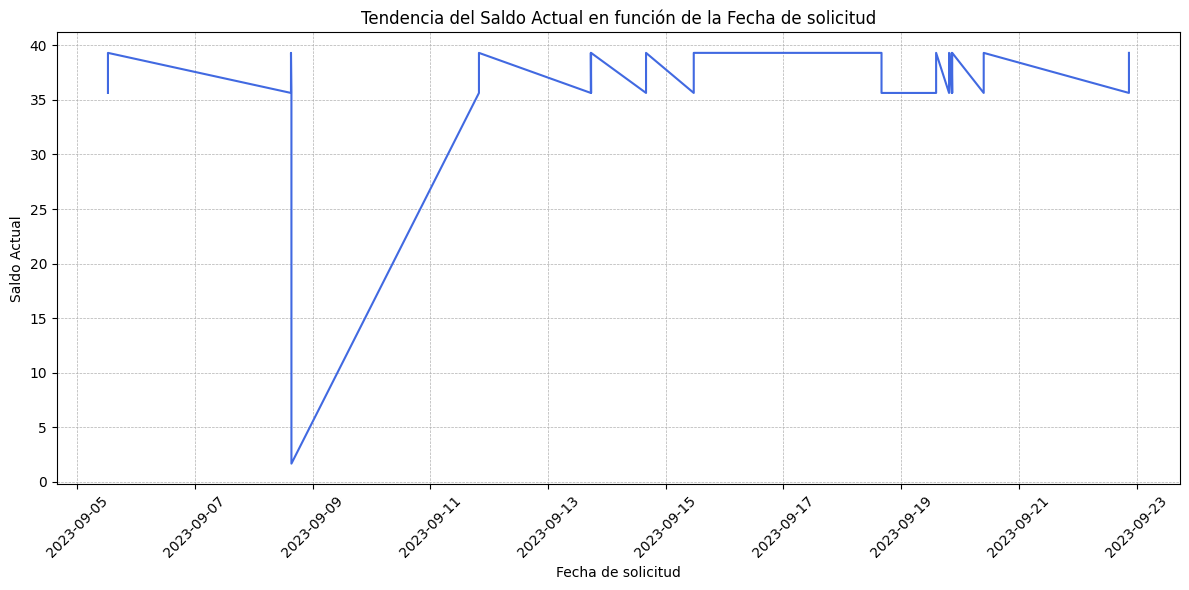

In [7]:
# Convertir la columna 'Fecha de solicitud' a formato de fecha
data['Fecha de solicitud'] = pd.to_datetime(data['Fecha de solicitud'])

# Ordenar el dataframe por 'Fecha de solicitud'
data_sorted = data.sort_values(by='Fecha de solicitud')

# 5. Gráfico de línea: Mostrar la tendencia del `Saldo Actual` en función de la `Fecha de solicitud`.
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['Fecha de solicitud'], data_sorted['Saldo Actual'], color='royalblue')
plt.title('Tendencia del Saldo Actual en función de la Fecha de solicitud')
plt.xlabel('Fecha de solicitud')
plt.ylabel('Saldo Actual')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


El gráfico de línea muestra la tendencia del Saldo Actual en función de la Fecha de solicitud. Se pueden observar fluctuaciones en el saldo a lo largo del tiempo.
<br>
<br>
A continuación, procederemos con el Diagrama de dispersión para visualizar la relación entre el Monto y el Pago

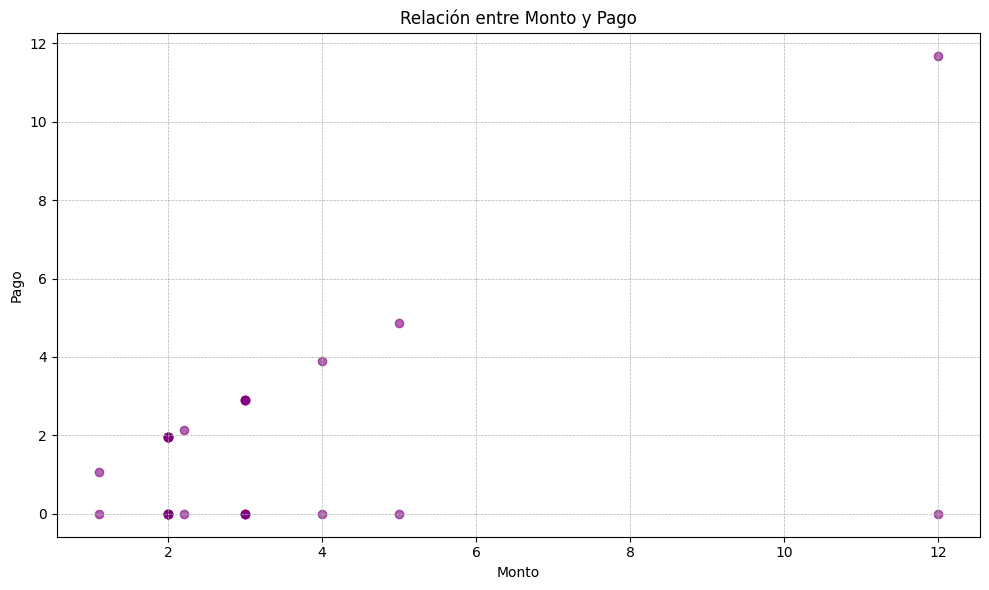

In [8]:
# 6. Diagrama de dispersión: Visualizar la relación entre el `Monto` y el `Pago`.
plt.figure(figsize=(10, 6))
plt.scatter(data['Monto'], data['Pago'], color='purple', alpha=0.6)
plt.title('Relación entre Monto y Pago')
plt.xlabel('Monto')
plt.ylabel('Pago')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


El diagrama de dispersión muestra la relación entre el Monto y el Pago. Como era de esperar, hay una correlación positiva entre ambas variables: a medida que aumenta el monto, también aumenta el pago. Sin embargo, también hay casos donde, a pesar de tener un monto positivo, el pago es cero, lo que podría indicar transacciones donde se aplicaron comisiones o impuestos que consumieron el monto total.
<br>
A continuación, crearemos un Box plot (diagrama de caja) para visualizar la distribución del Monto y detectar valores atípicos.

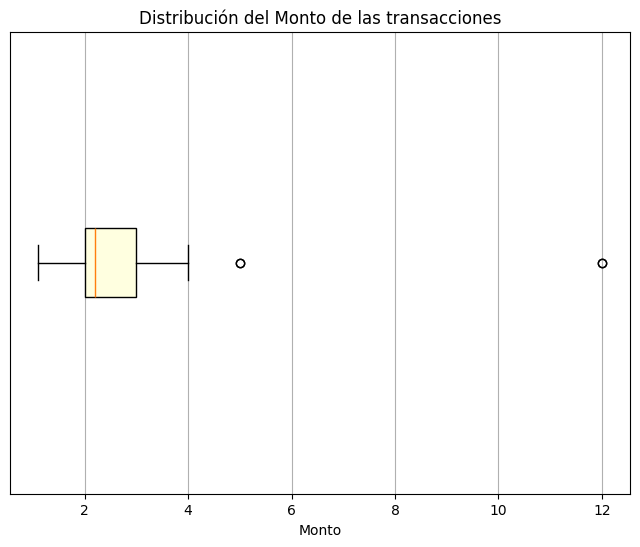

In [9]:
# 7. Box plot (diagrama de caja): Visualizar la distribución del `Monto` y detectar valores atípicos.
plt.figure(figsize=(8, 6))
plt.boxplot(data['Monto'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightyellow'))
plt.title('Distribución del Monto de las transacciones')
plt.xlabel('Monto')
plt.yticks([])
plt.grid(axis='x')
plt.show()


El diagrama de caja (box plot) muestra la distribución del monto de las transacciones. La línea dentro de la caja representa la mediana, mientras que los bordes de la caja representan el primer y tercer cuartil. Los "bigotes" del gráfico se extienden hasta 1.5 veces el rango intercuartil (IQR) o hasta el mínimo o máximo dato, lo que sea menor. Los puntos fuera de los bigotes son considerados valores atípicos.
<br>
<br>
Se puede observar que hay varios valores atípicos en el lado derecho, indicando transacciones con montos más altos que la mayoría.
<br>
<br>
Finalmente, procederemos con el Gráfico de área para mostrar el Saldo Actual en función de la Fecha de solicitud. Es similar al gráfico de línea que ya generamos, pero con el área bajo la línea rellena.

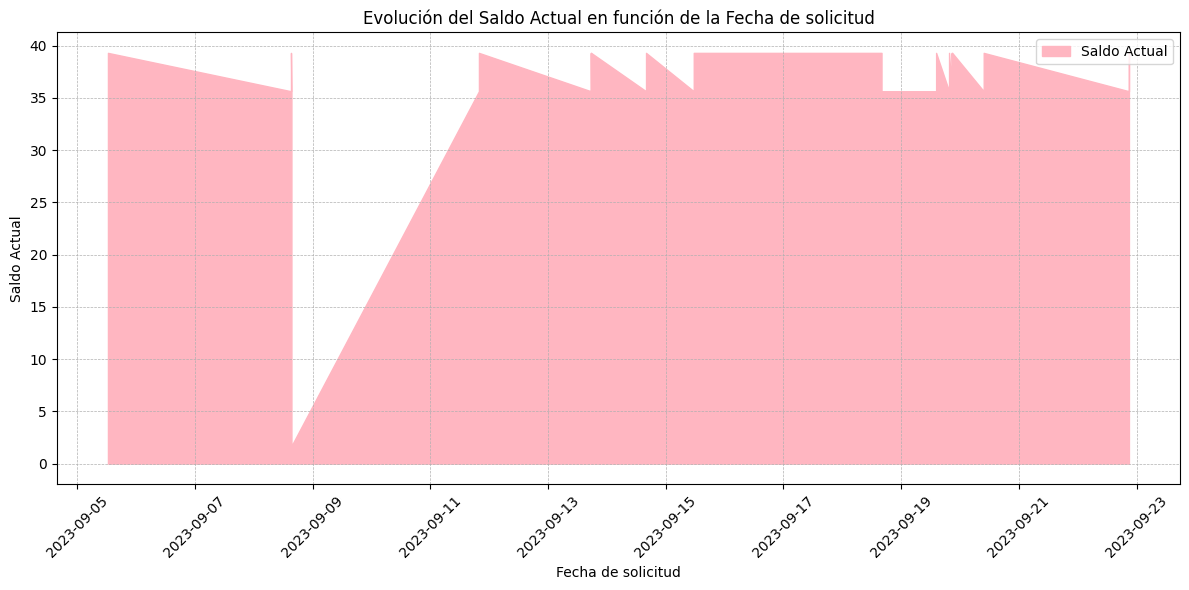

In [10]:
# 8. Gráfico de área: Mostrar el `Saldo Actual` en función de la `Fecha de solicitud`.
plt.figure(figsize=(12, 6))
plt.fill_between(data_sorted['Fecha de solicitud'], data_sorted['Saldo Actual'], color='lightpink', label='Saldo Actual')
plt.title('Evolución del Saldo Actual en función de la Fecha de solicitud')
plt.xlabel('Fecha de solicitud')
plt.ylabel('Saldo Actual')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
